[View in Colaboratory](https://colab.research.google.com/github/tana777/gitskills/blob/master/cs482_hw2.ipynb)

In [1]:
# Install pytorch and tqdm (if necessary)
!pip install torch
!pip install torchvision
!pip install tqdm

    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a29a000 @  0x7f641aa311c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 3.6MB/s 
    100% |████████████████████████████████| 2.0MB 9.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
# Mount your google drive as the data drive
# This will require google authorization
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# Handle imports

import math
import os
import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import numpy as np
import tqdm

from IPython import display

In [0]:
# The Args object will contain all of our parameters
# If you want to run with different arguments, create another Args object

class Args(object):
  def __init__(self, name='mnist', batch_size=64, test_batch_size=1000,
            epochs=10, lr=0.01, optimizer='sgd', momentum=0.5,
            seed=1, log_interval=100, dataset='mnist',
            data_dir='/content/drive/My Drive/cs482/data', model='default',
            cuda=True):
    self.name = name # name for this training run. Don't use spaces.
    self.batch_size = batch_size
    self.test_batch_size = test_batch_size # Input batch size for testing
    self.epochs = epochs # Number of epochs to train
    self.lr = lr # Learning rate
    self.optimizer = optimizer # sgd/p1sgd/adam/rms_prop
    self.momentum = momentum # SGD Momentum
    self.seed = seed # Random seed
    self.log_interval = log_interval # Batches to wait before logging
                                     # detailed status. 0 = never
    self.dataset = dataset # mnist/fashion_mnist
    self.data_dir = data_dir
    self.model = model # default/P2Q7DoubleChannelsNet/P2Q7HalfChannelsNet/
                  # P2Q8BatchNormNet/P2Q9DropoutNet/P2Q10DropoutBatchnormNet/
                  # P2Q11ExtraConvNet/P2Q12RemoveLayerNet/P2Q13UltimateNet
    self.cuda = cuda and torch.cuda.is_available()

In [0]:
# Define the neural network classes

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        # F is just a functional wrapper for modules from the nn package
        # see http://pytorch.org/docs/_modules/torch/nn/functional.html
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


class P2Q7HalfChannelsNet(nn.Module):
    def __init__(self):
        super(P2Q7HalfChannelsNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError


class P2Q7DoubleChannelsNet(nn.Module):
    def __init__(self):
        super(P2Q7DoubleChannelsNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q8BatchNormNet(nn.Module):
    def __init__(self):
        super(P2Q8BatchNormNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q9DropoutNet(nn.Module):
    def __init__(self):
        super(P2Q9DropoutNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q10DropoutBatchnormNet(nn.Module):
    def __init__(self):
        super(P2Q10DropoutBatchnormNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q11ExtraConvNet(nn.Module):
    def __init__(self):
        super(P2Q11ExtraConvNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q12RemoveLayerNet(nn.Module):
    def __init__(self):
        super(P2Q12RemoveLayerNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

class P2Q13UltimateNet(nn.Module):
    def __init__(self):
        super(P2Q13UltimateNet, self).__init__()
        # TODO Implement me
        raise NotImplementedError

    def forward(self, x):
        # TODO Implement me
        raise NotImplementedError

In [0]:
def prepare_dataset(args):
    # choose the dataset
    if args.dataset == 'mnist':
        DatasetClass = datasets.MNIST
    elif args.dataset == 'fashion_mnist':
        DatasetClass = datasets.FashionMNIST
    else:
        raise ValueError('unknown dataset: ' + args.dataset +
                ' try mnist or fashion_mnist')

    def time_stamp(fname, fmt='%m-%d-%H-%M_{fname}'):
        return datetime.datetime.now().strftime(fmt).format(fname=fname)
        
    training_run_name = time_stamp(args.dataset + '_' + args.name)

    kwargs = {'num_workers': 1, 'pin_memory': True} if args.cuda else {}

    # Create the dataset: mnist or fasion_mnist
    dataset_dir = os.path.join(args.data_dir, args.dataset)
    training_run_dir = os.path.join(args.data_dir, training_run_name)
    train_dataset = DatasetClass(
        dataset_dir, train=True, download=True,
        transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ]))
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=args.batch_size, shuffle=True, **kwargs)
    test_dataset = DatasetClass(
        dataset_dir, train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ]))
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=args.test_batch_size, shuffle=True, **kwargs)
    
    if not os.path.exists(training_run_dir):
        os.makedirs(training_run_dir)

    return train_loader, test_loader, train_dataset, test_dataset, training_run_dir

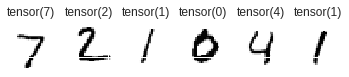

In [8]:
# visualize some images

args = Args()
_, _, _, test_dataset, _ = prepare_dataset(args)
images = test_dataset.test_data[:6]
labels = test_dataset.test_labels[:6]
fig, axes = plt.subplots(1,6)
for axis, img, lbl in zip(axes, images, labels):
    axis.imshow(img)
    axis.set_title(lbl)
    axis.set_yticklabels([])
    axis.set_xticklabels([])
plt.show()


In [0]:
def train(model, optimizer, train_loader, epoch, total_minibatch_count,
        train_losses, train_accs):
    # Training for a full epoch

    model.train()
    correct_count, total_loss, total_acc = 0., 0., 0.
    progress_bar = tqdm.tqdm(train_loader, desc='Training')
    
    for batch_idx, (data, target) in enumerate(progress_bar):
        if args.cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)

        optimizer.zero_grad()

        # Forward prediction step
        output = model(data)
        loss = F.nll_loss(output, target)

        # Backpropagation step
        loss.backward()
        optimizer.step()

        # The batch has ended, determine the accuracy of the predicted outputs
        pred = output.data.max(1)[1]  

        # target labels and predictions are categorical values from 0 to 9.
        matches = target == pred
        accuracy = matches.float().mean()
        correct_count += matches.sum()

        if args.log_interval != 0 and \
                total_minibatch_count % args.log_interval == 0:

            train_losses.append(loss.data[0])
            train_accs.append(accuracy.data[0])
            
        total_loss += loss.data
        total_acc += accuracy.data
            
        progress_bar.set_description(
            'Epoch: {} loss: {:.4f}, acc: {:.2f}'.format(
                epoch, total_loss / (batch_idx + 1), total_acc / (batch_idx + 1)))
        #progress_bar.refresh()

        total_minibatch_count += 1

    return total_minibatch_count

In [0]:
def test(model, test_loader, epoch, total_minibatch_count,
        val_losses, val_accs):
    # Validation Testing
    model.eval()
    test_loss, correct = 0., 0.
    progress_bar = tqdm.tqdm(test_loader, desc='Validation')
    with torch.no_grad():
        for data, target in progress_bar:
            if args.cuda:
                data, target = data.cuda(), target.cuda()
            data, target = Variable(data), Variable(target)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').data  # sum up batch loss
            pred = output.data.max(1)[1]  # get the index of the max log-probability
            correct += (target == pred).float().sum()

    test_loss /= len(test_loader.dataset)
    
    acc = correct / len(test_loader.dataset)

    val_losses.append(test_loss)
    val_accs.append(acc)
    
    progress_bar.clear()
    progress_bar.write(
        '\nEpoch: {} validation test results - Average val_loss: {:.4f}, val_acc: {}/{} ({:.2f}%)'.format(
            epoch, test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

    return acc

In [0]:
# Run the experiment
def run_experiment(args):

    total_minibatch_count = 0

    torch.manual_seed(args.seed)
    if args.cuda:
        torch.cuda.manual_seed(args.seed)

    train_loader, test_loader, _, _, run_path = prepare_dataset(args)

    epochs_to_run = args.epochs

    # Choose model
    # TODO add all the other models here if their parameter is specified
    if args.model == 'default' or args.model == 'P2Q7DefaultChannelsNet':
        model = Net()
    elif args.model in globals():
        model = globals()[args.model]()
    else:
        raise ValueError('Unknown model type: ' + args.model)

    if args.cuda:
        model.cuda()

    # Choose optimizer
    if args.optimizer == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    elif args.optimizer == 'adam':
        optimizer = optim.Adam(model.parameters())
    elif args.optimizer == 'rmsprop':
        optimizer = optim.RMSprop(model.parameters())
    else:
        raise ValueError('Unsupported optimizer: ' + args.optimizer)

    # Run the primary training loop, starting with validation accuracy of 0
    val_acc = 0
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    for epoch in range(1, epochs_to_run + 1):
        
        # train for 1 epoch
        total_minibatch_count = train(model, optimizer, train_loader,
                                    epoch, total_minibatch_count,
                                    train_losses, train_accs)
        # validate progress on test dataset
        val_acc = test(model, test_loader, epoch, total_minibatch_count,
                       val_losses, val_accs)
        
    fig, axes = plt.subplots(1,4, figsize=(13,4))
    # plot the losses and acc
    plt.title(args.name)
    axes[0].plot(train_losses)
    axes[0].set_title("Loss")
    axes[1].plot(train_accs)
    axes[1].set_title("Acc")
    axes[2].plot(val_losses)
    axes[2].set_title("Val loss")
    axes[3].plot(val_accs)
    axes[3].set_title("Val Acc")
    
    # Write to csv file
    with open(os.path.join(run_path + 'train.csv'), 'w') as f:
        csvw = csv.writer(f, delimiter=',')
        for loss, acc in zip(train_losses, train_accs):
            csvw.writerow((loss, acc))

    # Predict and Test
    images, labels = next(iter(test_loader))
    if args.cuda:
        images, labels = images.cuda(), labels.cuda()
    output = model(images)
    predicted = torch.max(output, 1)[1]
    fig, axes = plt.subplots(1,6)
    for i, (axis, img, lbl) in enumerate(zip(axes, images, predicted)):
        if i > 5:
            break
        img = img.permute(1,2,0).squeeze()
        axis.imshow(img)
        axis.set_title(lbl.data)
        axis.set_yticklabels([])
        axis.set_xticklabels([])
            
    if args.dataset == 'fashion_mnist' and val_acc > 0.92 and val_acc <= 1.0:
        print("Congratulations, you beat the Question 13 minimum of 92"
            "with ({:.2f}%) validation accuracy!".format(val_acc))

Training:   0%|          | 0/938 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 1 validation test results - Average val_loss: 0.1589, val_acc: 9523.0/10000 (95.23%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 2 validation test results - Average val_loss: 0.0966, val_acc: 9683.0/10000 (96.83%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 3 validation test results - Average val_loss: 0.0750, val_acc: 9766.0/10000 (97.66%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 4 validation test results - Average val_loss: 0.0617, val_acc: 9807.0/10000 (98.07%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 5 validation test results - Average val_loss: 0.0559, val_acc: 9830.0/10000 (98.30%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 6 validation test results - Average val_loss: 0.0496, val_acc: 9833.0/10000 (98.33%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 7 validation test results - Average val_loss: 0.0478, val_acc: 9862.0/10000 (98.62%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 8 validation test results - Average val_loss: 0.0451, val_acc: 9864.0/10000 (98.64%)


Training:   0%|          | 0/938 [00:00<?, ?it/s]


Epoch: 9 validation test results - Average val_loss: 0.0385, val_acc: 9877.0/10000 (98.77%)


Validation: 100%|██████████| 10/10 [00:01<00:00,  6.84it/s]



Epoch: 10 validation test results - Average val_loss: 0.0395, val_acc: 9881.0/10000 (98.81%)


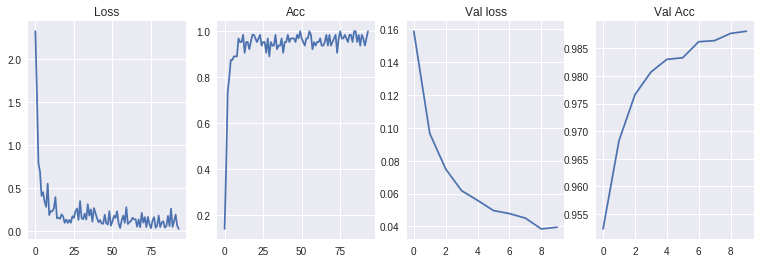

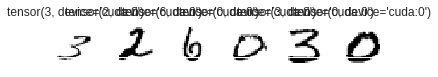

In [14]:
run_experiment(Args())